In [2]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

In [3]:
def compare(arch):
    dfr=pd.read_csv(f'/home/j/usfq/Proyecto-Integrador/StockPredictionModels/Results/metrics/{arch}_hypothesis.csv')
    dfs=pd.read_csv(f'/home/j/usfq/Proyecto-Integrador/StockPredictionModels/Results/smetrics/{arch}_hypothesis.csv')
    #make a new dataframe with all the rows in dfr that the index ends in 9
    dfr=dfr[dfr.index%10==9]
    ticker=['AAPL','AMZN','GOOG','GOOGL','MSFT','TSLA']
    dfr['ticker']=ticker
    dfs['ticker']=ticker
    #melt the dataframes
    dfr=pd.melt(dfr,id_vars=['ticker'])
    dfs=pd.melt(dfs,id_vars=['ticker'])
    #turn the ticker column into the columns
    dfr=dfr.pivot(index='variable',columns='ticker',values='value')
    dfs=dfs.pivot(index='variable',columns='ticker',values='value')
    #get the average of each row
    dfr['Average']=dfr.mean(axis=1)
    dfs['Average']=dfs.mean(axis=1)

    
    
    return dfr,dfs

import matplotlib.pyplot as plt

# Assuming dfr and dfs are DataFrames with the same index and 'Average' column
def plot_bars(dfr, dfs):
    fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.35
    val=[dfr['Average'][0],dfr['Average'][1],dfr['Average'][2],dfr['Average'][4]]
    vals=[dfs['Average'][0],dfs['Average'][1],dfs['Average'][2],dfs['Average'][4]]

    indexs=[dfr.index.values[0],dfr.index.values[1],dfr.index.values[2],dfr.index.values[4]]
    # Set the x-axis positions for each set of bars
    x_positions_dfr = range(len(dfr.index)-1)
    x_positions_dfs = [x + bar_width for x in x_positions_dfr]

    # Plot bars for DF1
    ax.bar(indexs, val, width=bar_width, color='red', label='Standard')

    # Plot bars for DF2
    ax.bar(x_positions_dfs, vals, width=bar_width, color='blue', label='Noise')

    # Adding labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Each Metric - DF1 and DF2')

    # Adding legend
    ax.legend()

    # Display the plot
    plt.show()
# Assuming dfr and dfs are DataFrames with the same index and 'Average' column
def plot_mse(dfr, dfs):
    fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.1
    val=[dfr['Average'][3]]
    vals=[dfs['Average'][3]]

    indexs=[dfr.index.values[3]]
    # Set the x-axis positions for each set of bars
    x_positions_dfr = range(len(dfr.index)-4)
    x_positions_dfs = [x + bar_width for x in x_positions_dfr]

    # Plot bars for DF1
    ax.bar(indexs, val, width=bar_width, color='red', label='Standard')

    # Plot bars for DF2
    ax.bar(x_positions_dfs, vals, width=bar_width, color='blue', label='Noise')

    # Adding labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Each Metric - DF1 and DF2')

    # Adding legend
    ax.legend()

    # Display the plot
    plt.show()


In [4]:
allr=[[]]
alls=[[]]

## GRU

In [5]:
dfr,dfs=compare('gru')

In [6]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,2.412359,1.128850,0.832255,0.805350,19.221320,0.748148,4.191380
MAPE,4.033542,1.265088,1.343424,1.299084,15.514237,3.934941,4.565053
MPE,0.824781,0.443830,0.368887,-0.279324,15.514237,-0.399315,2.745516
MSE,8.026194,2.151389,1.240878,1.116118,377.119431,0.966932,65.103490
RMSE,2.833054,1.466761,1.113947,1.056465,19.419563,0.983327,4.478853


In [7]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,2.441268,1.151828,0.953753,0.808064,19.140636,0.837986,4.222256
MAPE,4.070889,1.292991,1.533014,1.300057,15.439586,4.513366,4.691650
MPE,1.404350,0.551888,0.732155,-0.282843,15.439586,-1.755571,2.681594
MSE,8.797770,2.239238,1.495254,1.092969,373.934691,1.102989,64.777152
RMSE,2.966104,1.496408,1.222806,1.045451,19.337391,1.050233,4.519732


## BiGRU

In [8]:
dfr,dfs=compare('bigru')

In [9]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,7.401411,1.950656,4.607709,5.045141,24.288402,0.738603,7.338653
MAPE,14.117508,2.178765,7.931071,8.771216,20.444597,3.870718,9.552313
MPE,14.117508,0.408734,7.931071,8.771216,20.444597,-0.581345,8.515297
MSE,58.536910,6.223950,22.623442,26.575183,600.447913,0.866452,119.212308
RMSE,7.650942,2.494785,4.756411,5.155112,24.504039,0.930834,7.582020


In [10]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,7.475529,2.225913,4.793571,5.178069,24.157976,0.790553,7.436935
MAPE,14.284434,2.530145,8.273655,9.021800,20.313237,4.161748,9.764170
MPE,14.284434,1.231756,8.273655,9.021800,20.313237,-1.050865,8.679003
MSE,59.773922,7.634390,24.587673,27.962673,594.071815,0.955157,119.164271
RMSE,7.731360,2.763040,4.958596,5.287974,24.373588,0.977321,7.681980


## LSTM

In [11]:
dfr,dfs=compare('lstm')

In [12]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.025719,1.424037,1.104447,1.596562,15.117441,4.223897,4.415351
MAPE,5.119240,1.606652,1.774330,2.538122,11.784429,19.031036,6.975635
MPE,4.734698,1.071592,-0.448850,-1.921113,11.784429,-16.822736,-0.266997
MSE,13.649819,3.163691,1.986999,4.056692,249.896028,23.735415,49.414774
RMSE,3.694566,1.778677,1.409610,2.014123,15.808100,4.871901,4.929496


In [13]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.141798,1.717528,1.149984,1.607055,15.117776,3.977201,4.451890
MAPE,5.330512,1.952853,1.843482,2.555095,11.784895,18.167780,6.939103
MPE,4.973124,1.717462,-0.201657,-1.838499,11.784895,-15.976793,0.076422
MSE,14.653296,4.507412,2.080275,4.059826,249.949795,21.261396,49.418667
RMSE,3.827962,2.123067,1.442316,2.014901,15.809801,4.611008,4.971509


## BiLSTM

In [14]:
dfr,dfs=compare('bilstm')

In [15]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,5.918665,2.239112,0.998267,2.903260,3.032847,1.046032,2.689697
MAPE,10.917059,2.567926,1.609499,4.472192,2.113622,5.487939,4.528039
MPE,10.917059,2.325058,0.122427,-4.396146,1.024305,-1.198868,1.465639
MSE,38.626792,7.271128,1.707927,9.692722,13.817657,1.641497,12.126287
RMSE,6.215046,2.696503,1.306877,3.113314,3.717211,1.281209,3.055027


In [16]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,6.029254,2.747013,1.126502,2.761763,2.999872,1.120126,2.797422
MAPE,11.147550,3.176590,1.812673,4.265946,2.089995,5.900956,4.732285
MPE,11.147550,3.064031,0.442322,-4.185787,0.971826,-1.937144,1.583800
MSE,40.027495,10.447686,1.982882,9.001299,13.487833,1.807322,12.792420
RMSE,6.326729,3.232288,1.408148,3.000217,3.672578,1.344367,3.164054


## TCN

In [17]:
dfr,dfs=compare('tcn')

In [18]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,4.601227,16.096046,1.815050,2.367442,23.592447,2.172404,8.440769
MAPE,8.241638,21.986926,2.884254,3.873394,20.023657,11.165625,11.362582
MPE,8.113419,21.986926,-1.250283,3.162286,20.023657,-5.431228,7.767463
MSE,26.288207,263.794948,5.018771,8.376972,644.399905,5.785419,158.944037
RMSE,5.127203,16.241766,2.240261,2.894300,25.385033,2.405290,9.048975


In [19]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,4.134401,15.917043,1.917463,2.381697,22.857303,2.301831,8.251623
MAPE,7.369362,21.706980,3.093893,3.897956,19.355086,11.722460,11.190956
MPE,7.297386,21.706980,0.058742,3.181305,19.355086,-7.286089,7.385568
MSE,22.423107,258.747269,5.615236,8.591088,616.833253,6.711618,153.153595
RMSE,4.735304,16.085623,2.369649,2.931056,24.836128,2.590679,8.924740


## BiTCN

In [20]:
dfr,dfs=compare('bitcn')

In [21]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.346821,4.135664,1.618779,6.288723,41.171684,1.798509,9.726697
MAPE,5.661902,4.902166,2.587357,11.143043,40.612115,9.376141,12.380454
MPE,3.214892,4.541434,-0.119220,11.143043,40.612115,-5.967492,8.904129
MSE,19.092350,22.782309,3.492165,41.800067,1747.748567,4.143603,306.509844
RMSE,4.369479,4.773082,1.868734,6.465297,41.806083,2.035584,10.219710


In [22]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.081736,3.872077,1.857739,6.211536,40.273254,1.838945,9.522548
MAPE,5.183166,4.530371,2.974236,11.001763,39.480377,9.546889,12.119467
MPE,0.211271,3.442374,0.392103,11.001763,39.480377,-6.083233,8.074109
MSE,13.827583,20.835470,4.628316,40.913501,1684.879050,4.377400,294.910220
RMSE,3.718546,4.564589,2.151352,6.396366,41.047278,2.092224,9.995059


## Transformer

In [23]:
dfr,dfs=compare('transformer')

In [24]:
allr.append(dfr['Average'].values)
dfr

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.737555,4.380876,1.888424,1.492354,7.141121,3.379102,3.669905
MAPE,6.466896,4.626748,3.034307,2.381077,5.209446,16.010076,6.288092
MPE,6.271670,-4.604002,1.041755,-0.641880,5.175684,-14.339172,-1.182657
MSE,19.156343,23.502880,5.279136,3.229861,63.237633,15.104238,21.585015
RMSE,4.376796,4.847977,2.297637,1.797181,7.952209,3.886417,4.193036


In [25]:
alls.append(dfs['Average'].values)
dfs

ticker,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
variable,,,,,,,
MAE,3.960333,4.336044,1.898751,1.515473,6.822192,3.430194,3.660498
MAPE,6.888937,4.581678,3.050605,2.417718,4.966153,16.202928,6.351337
MPE,6.759546,-4.560332,1.014225,-0.621190,4.907053,-14.529847,-1.171757
MSE,21.278721,23.066225,5.216213,3.245125,58.867809,15.515749,21.198307
RMSE,4.612886,4.802731,2.283903,1.801423,7.672536,3.939004,4.185414


# Average

In [26]:
allr.pop(0)
allr=np.array(allr)
meanr=np.mean(allr,axis=0)
print(meanr)

[  5.78177898   7.95030967   3.99262713 104.69939369   6.21530247]


In [27]:
alls.pop(0)
alls=np.array(alls)
means=np.mean(alls,axis=0)
print(means)

[  5.76331023   7.96985258   3.90124845 102.20209025   6.20606979]


In [28]:
dfr['Average']=meanr
dfs['Average']=means

/tmp/ipykernel_1031/2273380548.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=[dfr['Average'][0],dfr['Average'][1],dfr['Average'][2],dfr['Average'][4]]
/tmp/ipykernel_1031/2273380548.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vals=[dfs['Average'][0],dfs['Average'][1],dfs['Average'][2],dfs['Average'][4]]


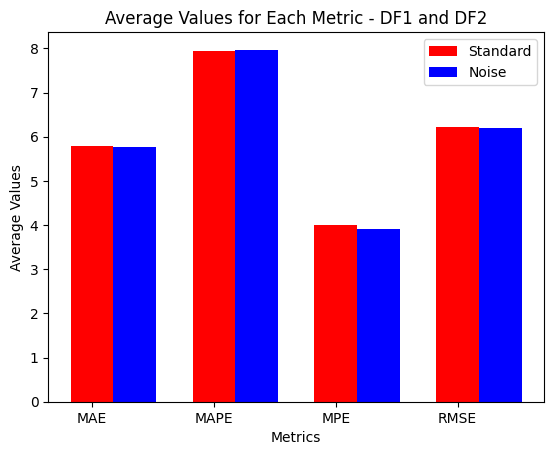

In [29]:
plot_bars(dfr,dfs)

/tmp/ipykernel_1031/2273380548.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=[dfr['Average'][3]]
/tmp/ipykernel_1031/2273380548.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vals=[dfs['Average'][3]]


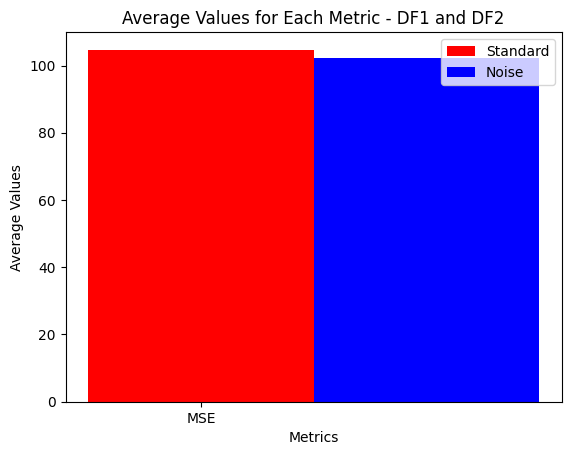

In [30]:
plot_mse(dfr,dfs)

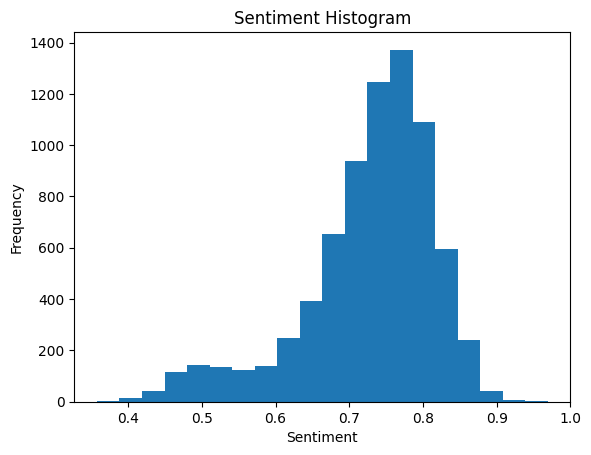

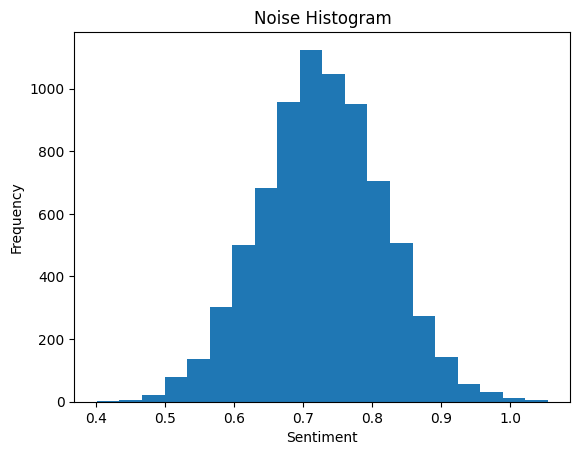

In [32]:
project_path='/home/j/usfq/Proyecto-Integrador/StockPredictionModels'
df=pd.read_csv(project_path+'/Data/Complete.csv')
sent=np.array(df['p_sentiment'])
mean=np.mean(sent)
std=np.std(sent)
noise=np.random.normal(mean,std,len(sent))
dfs=df.copy()
dfs['p_sentiment']=noise

#histogram of the sentiment
plt.hist(df['p_sentiment'],bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

#histogram of the noise
plt.hist(dfs['p_sentiment'],bins=20)
plt.title('Noise Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [33]:
fifth_percentile = np.percentile(df['p_sentiment'], 5)
ninety_fifth_percentile = np.percentile(df['p_sentiment'], 95)
print(fifth_percentile)
print(ninety_fifth_percentile)

0.5233656259327335
0.8405815913436909


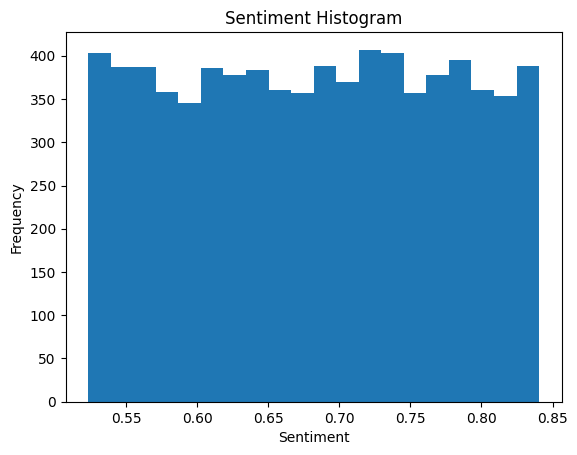

In [34]:
random_numbers = np.random.uniform(0.5233656259327335, 0.8405815913436909,len(sent))
dff=df.copy()
dff['p_sentiment']=random_numbers

#histogram of the sentiment
plt.hist(dff['p_sentiment'],bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()